# Testing OpenAI API Key

In [7]:
import openai
from openai import OpenAI
import os
import utils

os.environ['OPENAI_API_KEY'] = utils.openai_api_key
client = OpenAI()

model = 'gpt-4o'

In [42]:
gpt_conversation = {}
gpt_conversation['system'] = '''
This GPT, MapMakerGPT, takes in a JSON representation of a pixel game world containing varied locations and buildings. The world map is in a JSON hierarchical structure which is used to describe where in the world certain objects are. For example:

"Los Angeles": {
    "Target Supermarket": [
        "Food Aisle",
        "Alcohol",
       "Cashier",
        ]
    },
    "Water Park": {
       "Water Slide",
       "Pool",
    },
}

This would be an example world map inputted to MapMakerGPT. Then, there would be a proposed addition in the form of a comment by a person living in this world. For example: "I want to read!". In this case, MapMakerGPT will decide whether this person can perform this action or realize this idea in the current game world and, if not, propose a new game world which contains the previous locations and objects in the world and adds to it a new location and sub-objects that allows the person to do their action or idea. In this case, one potential idea is to add a library to the game world.

When proposing a change to the game world, make decisions on whether to add a new location based on how feasible the given activity is, and what’s the most likely place it could be done from the current JSON file. Then decide to create a new location if the person is unlikely to do the activity at this place on scale of 1-10 (if below 6 generate new place).

Another potential query to MapMakerGPT is generate coordinates. Here is an example of coordinates for the map example above:

"Los Angeles":  {
    "coordinates": {
        "bottom_left": (-100, -100),
        "top_right": (100, 100),
    },
    "Target Supermarket": [
        "bottom_left": (-70, -80),
        "top_right": (-30, -40),
        "Food Aisle": {
            "bottom_left": (-65, -75),
            "top_right": (-55, -55),
        },
        "Alcohol": {
            "bottom_left": (-45, -75),
            "top_right": (-35, -50),
        },
       "Cashier": {
            "bottom_left": (-30, -65),
            "top_right": (-30, -55),
        },
        ]
    },
    "Water Park": {
       "bottom_left": (20, 40),
       "bottom_right": (80, 90),
       "Water Slide": {
           "bottom_left": (30, 50),
           "top_right": (35, 55)
       },
       "Pool": {
           "bottom_left": (50, 60),
           "top_right": (80, 80),
       },
    },
}

MapMakerGPT would be given a JSON map and be asked to create a coordinate mapping for the world which follows the following rules:

- Provide the dimensions of each location and its subitems such that everything has 4 coordinates forming a rectangle
- Create a rectangle of coordinates for each of the locations in the world between the coordinates (-300, 300) using only integer coordinates.
- Make sure to include coordinates for all subobjects. Coordinates for subobjects must be inside of their container location.
- Make sure that different locations do not overlap with each other. In the above example, that would mean that the "Water Park" should not overlap with the "Target Supermarket".
- Make a bounding box for each location and subobject in the world.
- The dimensions of each place should make sense logically with respect to the whole map, i.e. the size of the place should be realistic compared to the other places on the map. 
- Please make sure that the placement of everything within the area also makes sense.
- Make the coordinate locations seem natural and fluid (not aligned with each other).
'''
gpt_conversation['user1'] = 'I like to play video games, the outdoors, and reading books. Create me a world map that I can explore and do these activities in!'

In [9]:
response = client.chat.completions.create(
    model=model,
    messages=[
        {'role': 'system', 'content': gpt_conversation['system']},
    {'role': 'user', 'content': gpt_conversation['user1']},
    ]
)

In [32]:
import json

def print_json(response):
    
    # Assuming model_dump_json() returns a JSON string
    json_string = response.model_dump_json()
    json_obj = json.loads(json_string)
    pretty_json_string = json.dumps(json_obj, indent=4)
    print(pretty_json_string)

In [33]:
print_json(response)

{
    "id": "chatcmpl-9UIvbWvk5D1k9CnZUPArO3NOJrd69",
    "choices": [
        {
            "finish_reason": "stop",
            "index": 0,
            "logprobs": null,
            "message": {
                "content": "Sure! I will create a world map for you where you can enjoy playing video games, outdoor activities, and reading books. Here\u2019s a JSON representation of a world map that accommodates these activities:\n\n```json\n{\n    \"City Park\": {\n        \"Picnic Area\": [\n            \"Picnic Tables\",\n            \"BBQ Grills\",\n            \"Restrooms\"\n        ],\n        \"Playground\": [\n            \"Swings\",\n            \"Slides\",\n            \"Climbing Structures\"\n        ],\n        \"Sports Field\": [\n            \"Soccer Field\",\n            \"Basketball Court\",\n            \"Tennis Court\"\n        ]\n    },\n    \"Community Center\": {\n        \"Video Game Room\": [\n            \"Consoles\",\n            \"Arcade Machines\",\n            \

In [36]:
print_json(response.choices[0])

{
    "finish_reason": "stop",
    "index": 0,
    "logprobs": null,
    "message": {
        "content": "Sure! I will create a world map for you where you can enjoy playing video games, outdoor activities, and reading books. Here\u2019s a JSON representation of a world map that accommodates these activities:\n\n```json\n{\n    \"City Park\": {\n        \"Picnic Area\": [\n            \"Picnic Tables\",\n            \"BBQ Grills\",\n            \"Restrooms\"\n        ],\n        \"Playground\": [\n            \"Swings\",\n            \"Slides\",\n            \"Climbing Structures\"\n        ],\n        \"Sports Field\": [\n            \"Soccer Field\",\n            \"Basketball Court\",\n            \"Tennis Court\"\n        ]\n    },\n    \"Community Center\": {\n        \"Video Game Room\": [\n            \"Consoles\",\n            \"Arcade Machines\",\n            \"VR Stations\"\n        ],\n        \"Library\": [\n            \"Fiction Section\",\n            \"Non-Fiction Section

In [44]:
gpt_conversation['assistant1'] = response.choices[0].message.content
print(gpt_conversation['assistant1'])

Sure! I will create a world map for you where you can enjoy playing video games, outdoor activities, and reading books. Here’s a JSON representation of a world map that accommodates these activities:

```json
{
    "City Park": {
        "Picnic Area": [
            "Picnic Tables",
            "BBQ Grills",
            "Restrooms"
        ],
        "Playground": [
            "Swings",
            "Slides",
            "Climbing Structures"
        ],
        "Sports Field": [
            "Soccer Field",
            "Basketball Court",
            "Tennis Court"
        ]
    },
    "Community Center": {
        "Video Game Room": [
            "Consoles",
            "Arcade Machines",
            "VR Stations"
        ],
        "Library": [
            "Fiction Section",
            "Non-Fiction Section",
            "Reading Tables"
        ],
        "Gym": [
            "Weights",
            "Cardio Machines",
            "Yoga Studio"
        ]
    }
}
```

In this world, "Ci

In [45]:
gpt_conversation['user2'] = 'Rewrite your response to include coordinates and rectangles for all the locations and sublocations!'

response2 = client.chat.completions.create(
    model=model,
    messages=[
        {'role': 'system', 'content': gpt_conversation['system']},
        {'role': 'user', 'content': gpt_conversation['user1']},
        {'role': 'assistant', 'content': gpt_conversation['assistant1']},
        {'role': 'user', 'content': gpt_conversation['user2']},
    ]
)

In [47]:
print_json(response2)

{
    "id": "chatcmpl-9UJVUmRkIYOxzdGCmhZLa2pUfGwBY",
    "choices": [
        {
            "finish_reason": "stop",
            "index": 0,
            "logprobs": null,
            "message": {
                "content": "Certainly! Here are the coordinates for the world map, which accommodates playing video games, outdoor activities, and reading books:\n\n```json\n{\n    \"City Park\": {\n        \"coordinates\": {\n            \"bottom_left\": (-250, 100),\n            \"top_right\": (-100, 250)\n        },\n        \"Picnic Area\": {\n            \"coordinates\": {\n                \"bottom_left\": (-240, 110),\n                \"top_right\": (-170, 160)\n            },\n            \"Picnic Tables\": {\n                \"coordinates\": {\n                    \"bottom_left\": (-230, 120),\n                    \"top_right\": (-220, 140)\n                }\n            },\n            \"BBQ Grills\": {\n                \"coordinates\": {\n                    \"bottom_left\": (-210,

In [48]:
print(response2.choices[0].message.content)

Certainly! Here are the coordinates for the world map, which accommodates playing video games, outdoor activities, and reading books:

```json
{
    "City Park": {
        "coordinates": {
            "bottom_left": (-250, 100),
            "top_right": (-100, 250)
        },
        "Picnic Area": {
            "coordinates": {
                "bottom_left": (-240, 110),
                "top_right": (-170, 160)
            },
            "Picnic Tables": {
                "coordinates": {
                    "bottom_left": (-230, 120),
                    "top_right": (-220, 140)
                }
            },
            "BBQ Grills": {
                "coordinates": {
                    "bottom_left": (-210, 120),
                    "top_right": (-200, 130)
                }
            },
            "Restrooms": {
                "coordinates": {
                    "bottom_left": (-190, 120),
                    "top_right": (-180, 130)
                }
            }
       

In [50]:
gpt_conversation['assistant2'] = response2.choices[0].message.content
print(gpt_conversation['assistant2'])

Certainly! Here are the coordinates for the world map, which accommodates playing video games, outdoor activities, and reading books:

```json
{
    "City Park": {
        "coordinates": {
            "bottom_left": (-250, 100),
            "top_right": (-100, 250)
        },
        "Picnic Area": {
            "coordinates": {
                "bottom_left": (-240, 110),
                "top_right": (-170, 160)
            },
            "Picnic Tables": {
                "coordinates": {
                    "bottom_left": (-230, 120),
                    "top_right": (-220, 140)
                }
            },
            "BBQ Grills": {
                "coordinates": {
                    "bottom_left": (-210, 120),
                    "top_right": (-200, 130)
                }
            },
            "Restrooms": {
                "coordinates": {
                    "bottom_left": (-190, 120),
                    "top_right": (-180, 130)
                }
            }
       

In [51]:
gpt_conversation['user3'] = 'Plot these coordinates on a map'

response3 = client.chat.completions.create(
    model=model,
    messages=[
        {'role': 'system', 'content': gpt_conversation['system']},
        {'role': 'user', 'content': gpt_conversation['user1']},
        {'role': 'assistant', 'content': gpt_conversation['assistant1']},
        {'role': 'user', 'content': gpt_conversation['user2']},
        {'role': 'assistant', 'content': gpt_conversation['assistant2']},
        {'role': 'user', 'content': gpt_conversation['user3']},
    ]   
)

In [75]:
gpt_conversation['assistant3'] = response3.choices[0].message.content

In [52]:
print_json(response3)

{
    "id": "chatcmpl-9UJZtnhlHiF4P8xVIG0CFvKQNbJkK",
    "choices": [
        {
            "finish_reason": "stop",
            "index": 0,
            "logprobs": null,
            "message": {
                "content": "Here's a textual representation to help visualize how these coordinates are mapped within the defined bounds:\n\n```\nMap Overview:\n Coordinates range from (-300, -300) to (300, 300)\n Minimal Widgets and Structure\n Not to scale but displays the relative positioning\n\n+---------------------------------------------------------------+\n|                                                               |\n|                        City Park                              |\n|                               +-------------------------------+\n|                               |                               |\n|        +--------------+       |      Picnic Area              |\n|        |Sports Field  |       |                               |\n|        |--------------|       | 

In [53]:
print(response3.choices[0].message.content)

Here's a textual representation to help visualize how these coordinates are mapped within the defined bounds:

```
Map Overview:
 Coordinates range from (-300, -300) to (300, 300)
 Minimal Widgets and Structure
 Not to scale but displays the relative positioning

+---------------------------------------------------------------+
|                                                               |
|                        City Park                              |
|                               +-------------------------------+
|                               |                               |
|        +--------------+       |      Picnic Area              |
|        |Sports Field  |       |                               |
|        |--------------|       |   +------------------+        |
|        |Soccer Field  +-------|   |Picnic Tables     |        |
|        |--------------|       |   +------------------+        |
|        |Basketball Court      |   |BBQ Grills        |        |
|        +

In [58]:
gpt_conversation['user3_alt'] = 'Plot these coordinates on a map for me using python'

{'system': '\nThis GPT, MapMakerGPT, takes in a JSON representation of a pixel game world containing varied locations and buildings. The world map is in a JSON hierarchical structure which is used to describe where in the world certain objects are. For example:\n\n"Los Angeles": {\n    "Target Supermarket": [\n        "Food Aisle",\n        "Alcohol",\n       "Cashier",\n        ]\n    },\n    "Water Park": {\n       "Water Slide",\n       "Pool",\n    },\n}\n\nThis would be an example world map inputted to MapMakerGPT. Then, there would be a proposed addition in the form of a comment by a person living in this world. For example: "I want to read!". In this case, MapMakerGPT will decide whether this person can perform this action or realize this idea in the current game world and, if not, propose a new game world which contains the previous locations and objects in the world and adds to it a new location and sub-objects that allows the person to do their action or idea. In this case, o

In [ ]:

response4 = client.chat.completions.create(
    model=model,
    messages=[
        {'role': 'system', 'content': gpt_conversation['system']},
        {'role': 'user', 'content': gpt_conversation['user1']},
        {'role': 'assistant', 'content': gpt_conversation['assistant1']},
        {'role': 'user', 'content': gpt_conversation['user2']},
        {'role': 'assistant', 'content': gpt_conversation['assistant2']},
        {'role': 'user', 'content': gpt_conversation['user3_alt']},
    ]   
)

In [55]:
print_json(response4)

{
    "id": "chatcmpl-9UJcezVSHiQ0EZuH67IelZQpAAzaV",
    "choices": [
        {
            "finish_reason": "stop",
            "index": 0,
            "logprobs": null,
            "message": {
                "content": "To plot these coordinates on a map using Python, we can use the `matplotlib` library. This library allows us to create detailed plots easily. Below is the Python code to visualize the world map with the given coordinates:\n\n```python\nimport matplotlib.pyplot as plt\nimport matplotlib.patches as patches\n\n# Define a helper function to plot rectangles\ndef plot_rectangle(ax, bottom_left, top_right, label):\n    width = top_right[0] - bottom_left[0]\n    height = top_right[1] - bottom_left[1]\n    rect = patches.Rectangle(bottom_left, width, height, fill=None, edgecolor='r', linewidth=2)\n    ax.add_patch(rect)\n    ax.text(bottom_left[0] + width / 2, bottom_left[1] + height / 2, label, \n            horizontalalignment='center', verticalalignment='center', fontsiz

In [56]:
print(response4.choices[0].message.content)

To plot these coordinates on a map using Python, we can use the `matplotlib` library. This library allows us to create detailed plots easily. Below is the Python code to visualize the world map with the given coordinates:

```python
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define a helper function to plot rectangles
def plot_rectangle(ax, bottom_left, top_right, label):
    width = top_right[0] - bottom_left[0]
    height = top_right[1] - bottom_left[1]
    rect = patches.Rectangle(bottom_left, width, height, fill=None, edgecolor='r', linewidth=2)
    ax.add_patch(rect)
    ax.text(bottom_left[0] + width / 2, bottom_left[1] + height / 2, label, 
            horizontalalignment='center', verticalalignment='center', fontsize=8, color='blue')

fig, ax = plt.subplots()

# Set limits
ax.set_xlim(-300, 300)
ax.set_ylim(-300, 300)

# Define the coordinates for each location
locations = {
    "City Park": {
        "coordinates": {
            "bottom_left": (-25

In [60]:
# get python code from response4
gpt_conversation['assistant3_alt'] = response4.choices[0].message.content

start_string = "```python\n"
end_string = "\n```"

code = gpt_conversation['assistant3_alt'].split(start_string)[1].split(end_string)[0]

import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define a helper function to plot rectangles
def plot_rectangle(ax, bottom_left, top_right, label):
    width = top_right[0] - bottom_left[0]
    height = top_right[1] - bottom_left[1]
    rect = patches.Rectangle(bottom_left, width, height, fill=None, edgecolor='r', linewidth=2)
    ax.add_patch(rect)
    ax.text(bottom_left[0] + width / 2, bottom_left[1] + height / 2, label, 
            horizontalalignment='center', verticalalignment='center', fontsize=8, color='blue')

fig, ax = plt.subplots()

# Set limits
ax.set_xlim(-300, 300)
ax.set_ylim(-300, 300)

# Define the coordinates for each location
locations = {
    "City Park": {
        "coordinates": {
            "bottom_left": (-250, 100),
            "top_right": (-100, 250)
        }
    },
    "Picnic Area": {
        "coordinates": {
            "bottom_left": (-240, 110),
            "top_right": (-170, 160)
        }
    },
    "Picnic Tables": {
       

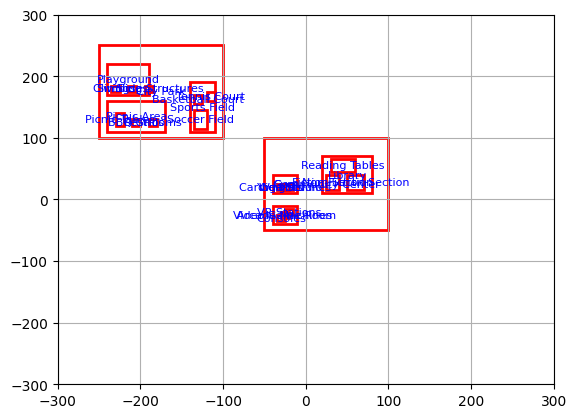

In [62]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define a helper function to plot rectangles
def plot_rectangle(ax, bottom_left, top_right, label):
    width = top_right[0] - bottom_left[0]
    height = top_right[1] - bottom_left[1]
    rect = patches.Rectangle(bottom_left, width, height, fill=None, edgecolor='r', linewidth=2)
    ax.add_patch(rect)
    ax.text(bottom_left[0] + width / 2, bottom_left[1] + height / 2, label, 
            horizontalalignment='center', verticalalignment='center', fontsize=8, color='blue')

fig, ax = plt.subplots()

# Set limits
ax.set_xlim(-300, 300)
ax.set_ylim(-300, 300)

# Define the coordinates for each location
locations = {
    "City Park": {
        "coordinates": {
            "bottom_left": (-250, 100),
            "top_right": (-100, 250)
        }
    },
    "Picnic Area": {
        "coordinates": {
            "bottom_left": (-240, 110),
            "top_right": (-170, 160)
        }
    },
    "Picnic Tables": {
        "coordinates": {
            "bottom_left": (-230, 120),
            "top_right": (-220, 140)
        }
    },
    "BBQ Grills": {
        "coordinates": {
            "bottom_left": (-210, 120),
            "top_right": (-200, 130)
        }
    },
    "Restrooms": {
        "coordinates": {
            "bottom_left": (-190, 120),
            "top_right": (-180, 130)
        }
    },
    "Playground": {
        "coordinates": {
            "bottom_left": (-240, 170),
            "top_right": (-190, 220)
        }
    },
    "Swings": {
        "coordinates": {
            "bottom_left": (-235, 175),
            "top_right": (-225, 185)
        }
    },
    "Slides": {
        "coordinates": {
            "bottom_left": (-215, 175),
            "top_right": (-205, 185)
        }
    },
    "Climbing Structures": {
        "coordinates": {
            "bottom_left": (-195, 175),
            "top_right": (-185, 185)
        }
    },
    "Sports Field": {
        "coordinates": {
            "bottom_left": (-140, 110),
            "top_right": (-110, 190)
        }
    },
    "Soccer Field": {
        "coordinates": {
            "bottom_left": (-135, 115),
            "top_right": (-120, 145)
        }
    },
    "Basketball Court": {
        "coordinates": {
            "bottom_left": (-135, 155),
            "top_right": (-125, 170)
        }
    },
    "Tennis Court": {
        "coordinates": {
            "bottom_left": (-120, 160),
            "top_right": (-110, 175)
        }
    },
    "Community Center": {
        "coordinates": {
            "bottom_left": (-50, -50),
            "top_right": (100, 100)
        }
    },
    "Video Game Room": {
        "coordinates": {
            "bottom_left": (-40, -40),
            "top_right": (-10, -10)
        }
    },
    "Consoles": {
        "coordinates": {
            "bottom_left": (-35, -35),
            "top_right": (-25, -25)
        }
    },
    "Arcade Machines": {
        "coordinates": {
            "bottom_left": (-30, -30),
            "top_right": (-20, -20)
        }
    },
    "VR Stations": {
        "coordinates": {
            "bottom_left": (-25, -25),
            "top_right": (-15, -15)
        }
    },
    "Library": {
        "coordinates": {
            "bottom_left": (20, 10),
            "top_right": (80, 70)
        }
    },
    "Fiction Section": {
        "coordinates": {
            "bottom_left": (25, 15),
            "top_right": (40, 40)
        }
    },
    "Non-Fiction Section": {
        "coordinates": {
            "bottom_left": (50, 15),
            "top_right": (70, 40)
        }
    },
    "Reading Tables": {
        "coordinates": {
            "bottom_left": (30, 45),
            "top_right": (60, 65)
        }
    },
    "Gym": {
        "coordinates": {
            "bottom_left": (-40, 10),
            "top_right": (-10, 40)
        }
    },
    "Weights": {
        "coordinates": {
            "bottom_left": (-35, 15),
            "top_right": (-25, 25)
        }
    },
    "Cardio Machines": {
        "coordinates": {
            "bottom_left": (-30, 15),
            "top_right": (-20, 25)
        }
    },
    "Yoga Studio": {
        "coordinates": {
            "bottom_left": (-25, 15),
            "top_right": (-15, 25)
        }
    }
}

# Plot each location and sublocation
for location, details in locations.items():
    plot_rectangle(ax, details["coordinates"]["bottom_left"], details["coordinates"]["top_right"], location)

# Add grid
ax.grid(True)

# Show the plot
plt.show()

In [81]:
prompt_tokens = response.usage.prompt_tokens
completion_tokens = response.usage.completion_tokens

prompt_tokens += response2.usage.prompt_tokens
completion_tokens += response2.usage.completion_tokens

prompt_tokens += response3.usage.prompt_tokens
completion_tokens += response3.usage.completion_tokens

prompt_tokens += response4.usage.prompt_tokens
completion_tokens += response4.usage.completion_tokens

num_prompt_chars = len(gpt_conversation['system'])*3 + len(gpt_conversation['user1'])*3 + len(gpt_conversation['assistant1'])*2 + len(gpt_conversation['user2'])*2 + len(gpt_conversation['assistant2'])*2 + len(gpt_conversation['user3']) + len(gpt_conversation['user3_alt'])

num_completion_chars = len(gpt_conversation['assistant1']) + len(gpt_conversation['assistant2']) + len(gpt_conversation['assistant3']) + len(gpt_conversation['assistant3_alt'])

print(f'Prompt tokens used: {prompt_tokens} ({num_prompt_chars} chars)')
print(f'Completion tokens used: {completion_tokens} ({num_completion_chars} chars)')
print(f'Total tokens used: {prompt_tokens + completion_tokens} ({num_prompt_chars + num_completion_chars} chars)')

Prompt tokens used: 6336 (23537 chars)
Completion tokens used: 3231 (15307 chars)
Total tokens used: 9567 (38844 chars)


In [73]:
prompt_rate = 5/1e6
completion_rate = 15/1e6

total_cost = (prompt_tokens * prompt_rate) + (completion_tokens * completion_rate)
print(f'Total cost: ${total_cost:.6f}')

Total cost: $0.080145
